In [ ]:
#Burada eğitiiğimiz fashion mnist modelini
#bağımsız projede deneyrek öğrenme başarısını kontrol edelim

from google.colab import files
uploaded = files.upload()  # Bilgisayarından dosyayı seç



Saving fashion_mnist_modeli.h5 to fashion_mnist_modeli.h5


In [ ]:
#Gerekli Kütüphaneleri Eklenmesi

from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import fashion_mnist

import numpy as np

import matplotlib.pyplot as plt



In [ ]:
from tensorflow.keras.models import load_model

model = load_model("fashion_mnist_modeli.h5")


In [ ]:
#Test Verisi Yükleme ve Önişleme

(_,_),(x_test, y_test) = fashion_mnist.load_data()
#test verisi bizim için yeterli

x_test=x_test/255.0
#veriyi normalize etme

x_test = x_test.reshape(-1,28,28,1)
#cnn modeline 4 parametre gönderildi


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Etiket Tanımlama

etiket_isimleri=[
    "T-shirt/top","Pantolon","Kazak","Elbise","Palto",
    "Sandalet","Gömlek","Spor Ayakkabı","Çanta","Bot"
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Gerçek etiket: Kazak
Tahmin edilen: Kazak


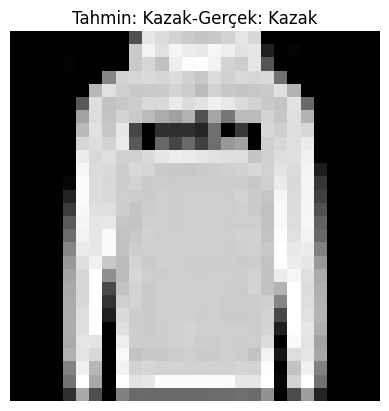

In [ ]:
#Tahmin ve Görselleştirme

#Test setinden rastgele örnek seçip deneyelim

ornek_index=87#seçilen görselin indexi
ornek_gorsel= x_test[ornek_index]#görselin bulunması veri setinden
ornek_label = y_test[ornek_index]#görselin etiketinin bulunması


tahmin = model.predict(np.expand_dims(ornek_gorsel,axis=0))
#modelin tahminin alınması
tahmin_edilen = np.argmax(tahmin)

print(f"Gerçek etiket: {etiket_isimleri[ornek_label]}")
#gerçek etiketin yazılması
print(f"Tahmin edilen: {etiket_isimleri[tahmin_edilen]}")
#model tahminin yazılması

#Görselin çizilmesi

plt.imshow(ornek_gorsel.reshape(28,28), cmap="gray")
plt.title(f"Tahmin: {etiket_isimleri[tahmin_edilen]}-Gerçek: {etiket_isimleri[ornek_label]}")
plt.axis("off")
plt.show()